In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os


from geopy.geocoders import Nominatim
from time import sleep
from random import randint

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/NUS/CS4225/russia-ukraine-sentiment-analysis"

filename = 'labelled_data.csv'
data_en = pd.read_csv(os.path.join(path, filename),lineterminator='\n')

In [ ]:
data_en.head()

,Unnamed: 0,userid,username,acctdesc,location,following,followers,totaltweets,usercreatedts,tweetid,tweetcreatedts,retweetcount,text,hashtags,language,coordinates,favorite_count,extractedts,tags,support
0,3544419,1270019892562051072,apif_pt,Historian\n#standwithukraine \n#KSAnimalRescue...,PT 🇵🇹,87,64,2106,2020-06-08 15:49:09.000000,1500984999255977986,2022-03-08 00:01:25,0,Russian embassy in lisbon right now. Colors of...,"[{'text': 'Ukraine', 'indices': [47, 55]}, {'t...",en,NaN,0,2022-03-08 00:07:15.901257,"['ukraine', 'standwithukraine', 'supportukrain...",ukraine
1,3544482,1499000505858723843,SmashmouthSigns,Order a Smashmouth Sign and make a political s...,NaN,1,2,2,2022-03-02 12:36:02.000000,1500985027202588675,2022-03-08 00:01:32,0,#standwithukraine #Ukraine️ #NoPutin #IStandW...,"[{'text': 'standwithukraine', 'indices': [0, 1...",en,NaN,0,2022-03-08 00:07:14.361054,"['standwithukraine', 'ukraine️', 'noputin', 'i...",ukraine
2,3544542,27030130,fabbfaye86,Fashion Designer - Fayenique \nhttps://t.co/Pd...,worcester england,637,156,1076,2009-03-27 15:46:41.000000,1500985058525687810,2022-03-08 00:01:39,0,Hope Putin gets a rocket up his ass ! 🚀\n#boyc...,"[{'text': 'boycottrussia', 'indices': [40, 54]...",en,NaN,0,2022-03-08 00:07:12.742955,"['boycottrussia', 'russiasucks', 'putinisawarc...",ukraine
3,3544827,1182308474853711872,avaresx,Renkli potinli çocukların belleklerinden öpüp ...,NaN,2748,2405,3084,2019-10-10 14:54:51.000000,1500985207435968515,2022-03-08 00:02:15,2,Imsges of war...\n#UkraineRussianWar\n#Ukraine...,"[{'text': 'UkraineRussianWar', 'indices': [32,...",en,NaN,0,2022-03-08 00:07:06.325479,"['ukrainerussianwar', 'ukraine️', 'peaceinukra...",neutral
4,3544997,705144507780591616,trumpathetic,"We’re deeply patriotic, proudly Independent, d...","Manhattan, NY",5000,731,78694,2016-03-02 21:35:26.000000,1500985297714176003,2022-03-08 00:02:36,0,🔥👀 This suggests Putin’s invasion is in real t...,"[{'text': 'Ukraine', 'indices': [118, 126]}, {...",en,NaN,1,2022-03-08 00:07:01.909990,"['ukraine', 'slavaukraini', 'standwithukraine'...",ukraine


In [ ]:
df_time = data_en[['tweetcreatedts','support']]
df_time['tweetcreatedts'] = pd.to_datetime(df_time['tweetcreatedts'],infer_datetime_format=True)
df_time['tweetcreatedts'] = df_time['tweetcreatedts'].apply(lambda x:x.date())

df_time_g = pd.DataFrame(df_time.groupby('support')['tweetcreatedts'].value_counts())
df_time_g.columns = ['tweetcount']
df_time_g.reset_index(inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


support
neutral    AxesSubplot(0.125,0.125;0.775x0.755)
russia     AxesSubplot(0.125,0.125;0.775x0.755)
ukraine    AxesSubplot(0.125,0.125;0.775x0.755)
Name: tweetcount, dtype: object

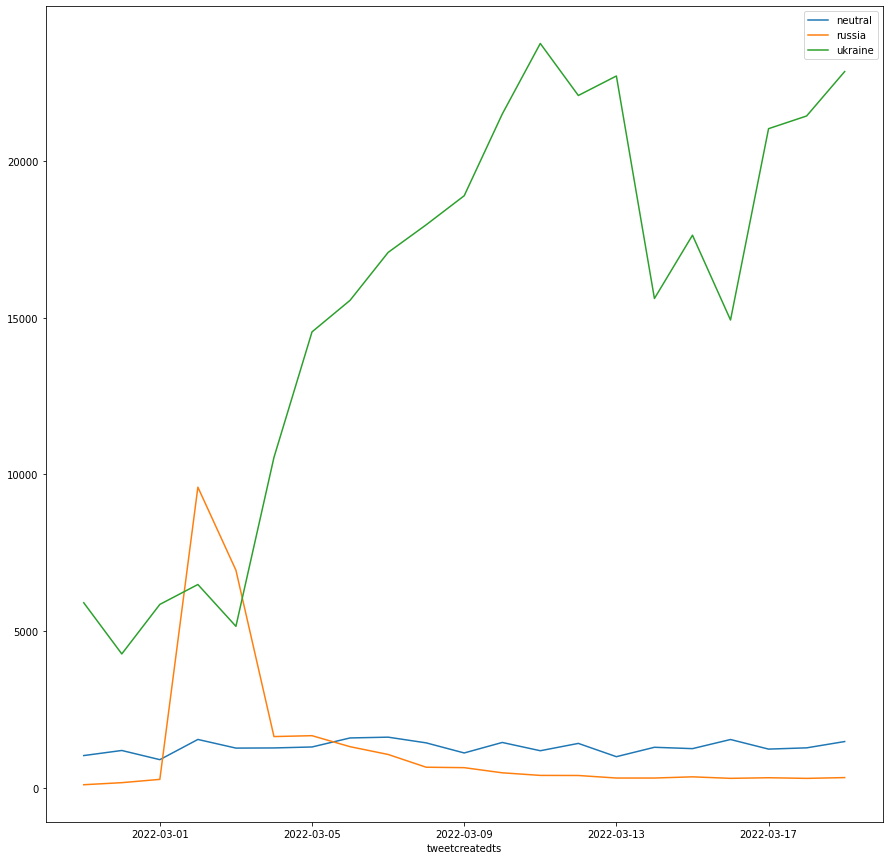

In [ ]:
plt.figure(figsize = (15,15))
df_time_g.set_index('tweetcreatedts').groupby('support')['tweetcount'].plot(legend=True)

# Imputation of location

In [ ]:
# Original count of NAs
data_en['location'].isna().value_counts()

False    237085
True     143744
Name: location, dtype: int64

In [ ]:
df_user_loc = data_en[['userid','location']]
df_user_loc.dropna(inplace=True,axis=0)

df_user_loc = pd.DataFrame(df_user_loc.groupby('userid')['location'].value_counts())
df_user_loc.columns = ['count']
df_user_loc = df_user_loc.reset_index()

# Keep userid's most tweeted from location
df_user_loc = df_user_loc.sort_values('count',ascending=False).drop_duplicates('userid',keep='first')[['userid','location']]
df_user_loc = df_user_loc.set_index('userid')['location']

# Fillna via mapping lookup
data_en.loc[data_en['location'].isnull(),'location'] = data_en['userid'].map(df_user_loc)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [ ]:
# New count of NAs
data_en['location'].isna().value_counts()

False    238658
True     142171
Name: location, dtype: int64

# Geopy
Convert string location into latlong coordinates

In [ ]:
geolocator = Nominatim(user_agent="my_user_agent")

geo_heatmap = data_en['location'].value_counts().reset_index()
geo_heatmap.columns = ['city','tweetCount']

# Filter out some smaller locations, so geolocator works faster. Remove this for the full run
geo_heatmap = geo_heatmap[geo_heatmap['tweetCount'] > 150]
# geo_heatmap = geo_heatmap[geo_heatmap['tweetCount'] > 70]

loc = []
for city in geo_heatmap['city']:
    sleep(randint(1*100,2*100)/100)
    print("Finding city: ",city)
    loc.append(geolocator.geocode(city))

geo_heatmap['loc'] = loc

geo_heatmap['lat'] = geo_heatmap.loc[~geo_heatmap['loc'].isnull(),'loc'].apply(lambda x:x.latitude)
geo_heatmap['lon'] = geo_heatmap.loc[~geo_heatmap['loc'].isnull(),'loc'].apply(lambda x:x.longitude)

# Some fake locations e.g. "live laugh love"
geo_heatmap.dropna(subset=['loc'], inplace=True)

geo_heatmap.head()

Finding city:  UK
Finding city:  Ukraine
Finding city:  United States
Finding city:  Yes
Finding city:  Україна
Finding city:  London, England
Finding city:  Canada
Finding city:  USA
Finding city:  Kyiv, Ukraine
Finding city:  London
Finding city:  Colorado, USA
Finding city:  United Kingdom
Finding city:  india
Finding city:  Украина
Finding city:  California, USA
Finding city:  Australia
Finding city:  Kyiv
Finding city:  Earth
Finding city:  Washington, DC
Finding city:  India
Finding city:  Los Angeles, CA
Finding city:  Florida, USA
Finding city:  Germany
Finding city:  Europe
Finding city:  Worldwide
Finding city:  England, United Kingdom
Finding city:  New York, USA
Finding city:  New York, NY
Finding city:  Toronto, Ontario
Finding city:  Brussels, Belgium
Finding city:  Texas, USA
Finding city:  New York
Finding city:  Planet Earth
Finding city:  Chicago, IL
Finding city:  Chicago
Finding city:  Deutschland
Finding city:  Toronto
Finding city:  Ontario, Canada
Finding city:  

,city,tweetCount,loc,lat,lon
0,UK,5360,"(United Kingdom, (54.7023545, -3.2765753))",54.702354,-3.276575
1,Ukraine,5140,"(Україна, (49.4871968, 31.2718321))",49.487197,31.271832
2,United States,3841,"(United States, (39.7837304, -100.445882))",39.783730,-100.445882
3,Yes,2576,"(فرودگاه یاسوج, کمربندی یاسوج, شهرک صنعتی فرود...",30.702718,51.547801
4,Україна,2087,"(Україна, (49.4871968, 31.2718321))",49.487197,31.271832


# Add country coordinates

In [ ]:
!pip install geocoder
import geocoder

geo_heatmap['country_json'] = geo_heatmap.apply(lambda row: (geocoder.osm([row['lat'], row['lon']], method='reverse')).
                                json
                                ,axis=1)
geo_heatmap['country'] = geo_heatmap['country_json'].apply(lambda x: x['country'])
geo_heatmap['country_lat'] = geo_heatmap['country_json'].apply(lambda x: x['lat'])
geo_heatmap['country_lon'] = geo_heatmap['country_json'].apply(lambda x: x['lng'])


geo_heatmap.to_csv("/content/drive/MyDrive/NUS/CS4225/location_map_latlong.csv",index=None)

     |████████████████████████████████| 98 kB 4.3 MB/s 


KeyboardInterrupt: ignored

# Read output of previous 2 cells, to resume work

In [ ]:
geo_heatmap = pd.read_csv("/content/drive/MyDrive/NUS/CS4225/location_map_latlong.csv")
geo_heatmap.head()

,city,tweetCount,loc,lat,lon,country_json,country_lat,country_lon
0,UK,5360,United Kingdom,54.702354,-3.276575,"{'accuracy': 0.001, 'address': 'Bothel and Thr...",54.714469,-3.272253
1,Ukraine,5140,Україна,49.487197,31.271832,"{'accuracy': 0.001, 'address': 'Кичинці, Набут...",49.501653,31.288912
2,United States,3841,United States,39.783730,-100.445882,"{'accuracy': 0.001, 'address': 'Decatur County...",39.784871,-100.403756
3,Yes,2576,"فرودگاه یاسوج, کمربندی یاسوج, شهرک صنعتی فرودگ...",30.702718,51.547801,"{'accuracy': 0.001, 'address': 'فرودگاه یاسوج,...",30.702718,51.547801
4,Україна,2087,Україна,49.487197,31.271832,"{'accuracy': 0.001, 'address': 'Кичинці, Набут...",49.501653,31.288912


# Merge geo_heatmap mapping table to the actual tweet data, and find groupings

In [ ]:
# Grouping by cities
# Drop tweets with invalid location
data_en_cities = data_en[data_en['location'].isin(geo_heatmap['city'])][['location','support']]

# Groupby location, then support
data_en_cities = pd.DataFrame(data_en_cities.groupby('location')['support'].value_counts())
data_en_cities.columns = ['tweetCount']

data_en_cities = data_en_cities.reset_index()

data_en_cities = data_en_cities.merge(geo_heatmap.drop(['tweetCount','loc'],axis=1), how='inner', left_on='location', right_on='city').drop('city',axis=1)

print(data_en_cities.shape)

(1026, 8)


In [ ]:
# Grouping by cities + week

# Drop tweets with invalid location
data_en_cities = data_en[data_en['location'].isin(geo_heatmap['city'])][['location','support','tweetcreatedts']]
data_en_cities['tweetcreatedts'] = pd.to_datetime(data_en_cities['tweetcreatedts'],infer_datetime_format=True)
data_en_cities['tweetcreatedts'] = data_en_cities['tweetcreatedts'].apply(lambda x:x.week)

# Groupby location, then support
data_en_cities = pd.DataFrame(data_en_cities.groupby(['tweetcreatedts','location'])['support'].value_counts())
data_en_cities.columns = ['tweetCount']

data_en_cities = data_en_cities.reset_index()

data_en_cities = data_en_cities.merge(geo_heatmap.drop(['tweetCount','loc'],axis=1), how='inner', left_on='location', right_on='city').drop('city',axis=1)

print(data_en_cities.shape)

data_en_cities.head()

(2970, 9)


,tweetcreatedts,location,support,tweetCount,lat,lon,country_json,country_lat,country_lon
0,8,"Abuja, Nigeria",neutral,1,9.064331,7.489297,"{'accuracy': 0.001, 'address': 'Wuse II, Abuja...",9.064904,7.48885
1,9,"Abuja, Nigeria",russia,39,9.064331,7.489297,"{'accuracy': 0.001, 'address': 'Wuse II, Abuja...",9.064904,7.48885
2,9,"Abuja, Nigeria",ukraine,9,9.064331,7.489297,"{'accuracy': 0.001, 'address': 'Wuse II, Abuja...",9.064904,7.48885
3,9,"Abuja, Nigeria",neutral,5,9.064331,7.489297,"{'accuracy': 0.001, 'address': 'Wuse II, Abuja...",9.064904,7.48885
4,10,"Abuja, Nigeria",ukraine,8,9.064331,7.489297,"{'accuracy': 0.001, 'address': 'Wuse II, Abuja...",9.064904,7.48885


# Geopandas Heatmap Visualisation

In [ ]:
!pip install geopandas
!pip install geoplot
!pip install mapclassify

import mapclassify as mc
import geoplot as gplt
import geopandas as gpd
from shapely.geometry import Point

     |████████████████████████████████| 1.0 MB 6.8 MB/s 
     |████████████████████████████████| 16.7 MB 343 kB/s 
     |████████████████████████████████| 6.3 MB 26.4 MB/s 
     |████████████████████████████████| 10.8 MB 11.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 34.1 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 10.8 MB 47.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... error
     |████████████████████████████████| 12.1 MB 26.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 19.3 MB 1.1 MB/s 
     |████████████████████████████████| 44 kB 3.1 MB/s 
  Created wheel for cartopy: filename=Cartopy-0.19.0.post1-cp37-cp37m-linux_x86_64.w

### Convert into proper geometry

In [ ]:
city_geometry = [Point(xy) for xy in zip(data_en_cities.lon, data_en_cities.lat)]

gdf_cities = gpd.GeoDataFrame(data_en_cities, crs="EPSG:4326", geometry=city_geometry)
gdf_cities.head()

,tweetcreatedts,location,support,tweetCount,lat,lon,country_json,country_lat,country_lon,geometry
0,8,"Abuja, Nigeria",neutral,1,9.064331,7.489297,"{'accuracy': 0.001, 'address': 'Wuse II, Abuja...",9.064904,7.48885,POINT (7.48930 9.06433)
1,9,"Abuja, Nigeria",russia,39,9.064331,7.489297,"{'accuracy': 0.001, 'address': 'Wuse II, Abuja...",9.064904,7.48885,POINT (7.48930 9.06433)
2,9,"Abuja, Nigeria",ukraine,9,9.064331,7.489297,"{'accuracy': 0.001, 'address': 'Wuse II, Abuja...",9.064904,7.48885,POINT (7.48930 9.06433)
3,9,"Abuja, Nigeria",neutral,5,9.064331,7.489297,"{'accuracy': 0.001, 'address': 'Wuse II, Abuja...",9.064904,7.48885,POINT (7.48930 9.06433)
4,10,"Abuja, Nigeria",ukraine,8,9.064331,7.489297,"{'accuracy': 0.001, 'address': 'Wuse II, Abuja...",9.064904,7.48885,POINT (7.48930 9.06433)


### Actual heatmap

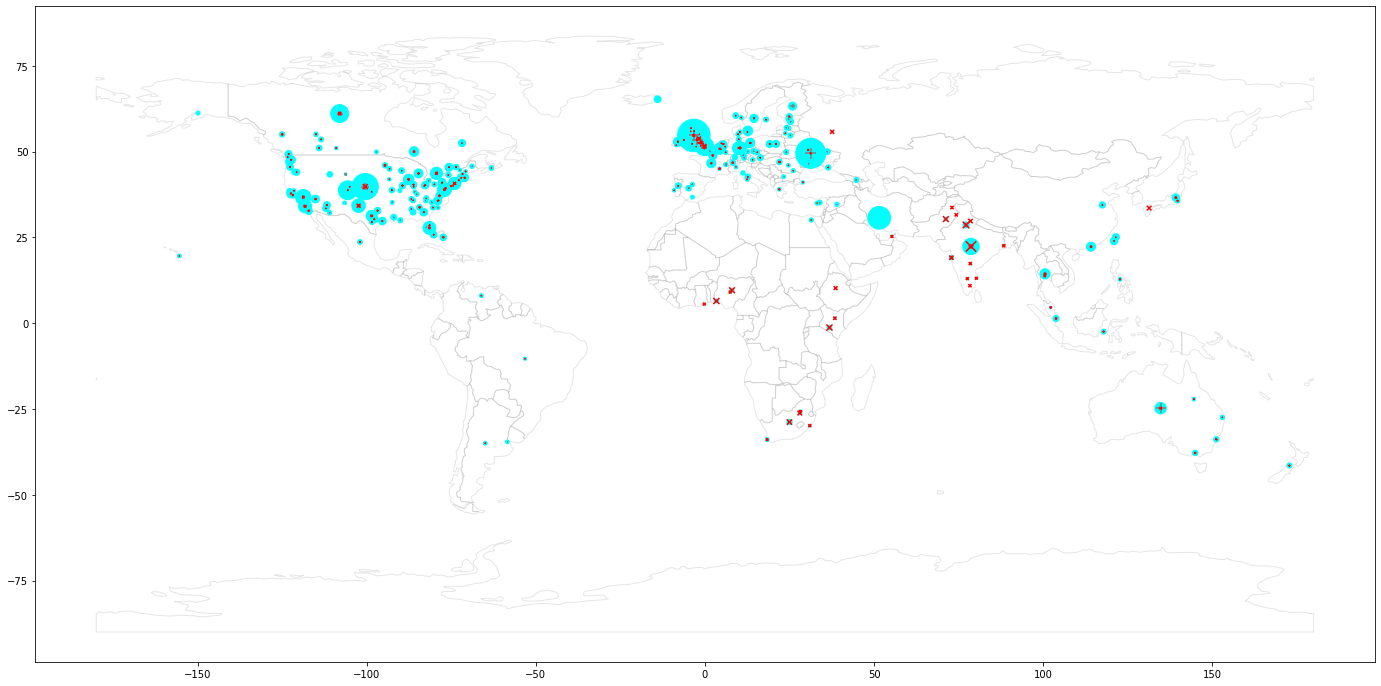

In [ ]:
fig, ax = plt.subplots(figsize = (24,24))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax = ax, color='white', edgecolor='black', alpha=0.1)

# Scale marker size
gdf_cities['tweetCountScaled'] = gdf_cities['tweetCount']/5

gdf_cities[gdf_cities['support'] == 'ukraine'].plot(ax=ax, marker='o', color='cyan', markersize="tweetCountScaled")
gdf_cities[gdf_cities['support'] == 'neutral'].plot(ax=ax, marker='+', color='gray', markersize="tweetCountScaled")
gdf_cities[gdf_cities['support'] == 'russia'].plot(ax=ax, marker='x', color='Red', markersize="tweetCountScaled")

### Plotting per week

In [ ]:
data_en_cities_wk = data_en_cities[data_en_cities['tweetcreatedts'] == 8]

city_geometry_wk = [Point(xy) for xy in zip(data_en_cities_wk.lon, data_en_cities_wk.lat)]

gdf_cities_wk = gpd.GeoDataFrame(data_en_cities_wk, crs="EPSG:4326", geometry=city_geometry_wk)
gdf_cities_wk.head()

,tweetcreatedts,location,support,tweetCount,lat,lon,country_json,country_lat,country_lon,geometry
0,8,"Abuja, Nigeria",neutral,1,9.064331,7.489297,"{'accuracy': 0.001, 'address': 'Wuse II, Abuja...",9.064904,7.488850,POINT (7.48930 9.06433)
9,8,"Accra, Ghana",ukraine,2,5.557110,-0.201238,"{'accuracy': 0.001, 'address': 'UBA, Cruicksha...",5.556939,-0.201526,POINT (-0.20124 5.55711)
10,8,"Accra, Ghana",neutral,1,5.557110,-0.201238,"{'accuracy': 0.001, 'address': 'UBA, Cruicksha...",5.556939,-0.201526,POINT (-0.20124 5.55711)
19,8,"Alabama, USA",neutral,1,33.258882,-86.829534,"{'accuracy': 0.001, 'address': '1151, Big Clou...",33.259362,-86.829546,POINT (-86.82953 33.25888)
20,8,"Alabama, USA",ukraine,1,33.258882,-86.829534,"{'accuracy': 0.001, 'address': '1151, Big Clou...",33.259362,-86.829546,POINT (-86.82953 33.25888)


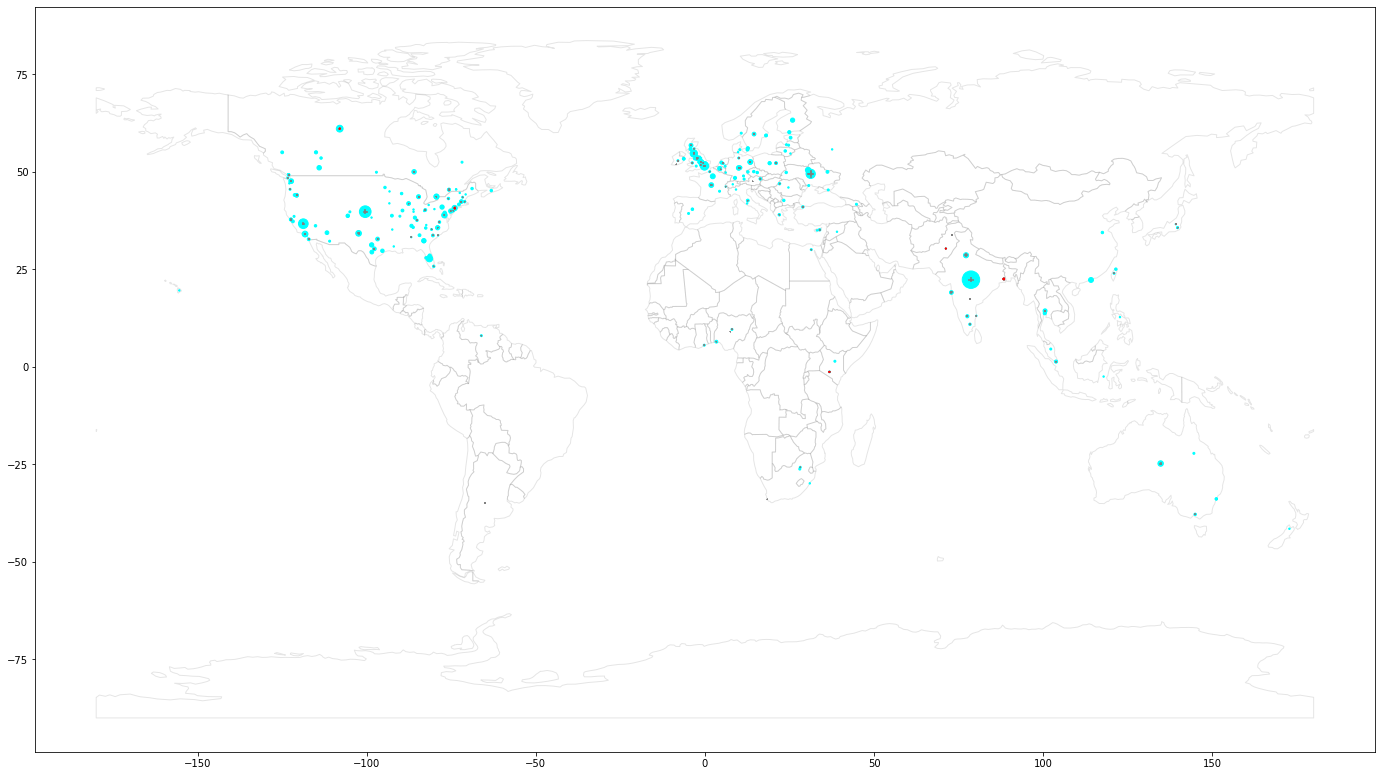

In [ ]:
fig, ax = plt.subplots(figsize = (24,24))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax = ax, color='white', edgecolor='black', alpha=0.1)

gdf_cities_wk['tweetCountScaled'] = gdf_cities_wk['tweetCount']*2
gdf_cities_wk[gdf_cities_wk['support'] == 'ukraine'].plot(ax=ax, marker='o', color='cyan', markersize="tweetCountScaled")
gdf_cities_wk[gdf_cities_wk['support'] == 'neutral'].plot(ax=ax, marker='+', color='gray', markersize="tweetCountScaled")
gdf_cities_wk[gdf_cities_wk['support'] == 'russia'].plot(ax=ax, marker='x', color='Red', markersize="tweetCountScaled")